In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.pyplot import savefig

### Makes World Map
basemap = gpd.read_file('../basemaps/ne_110m_admin_0_countries.shp').set_index('ADMIN')
world = gpd.read_file('../basemaps/ne_10m_admin_0_countries_lakes.shp').set_index('NAME_EN')

# A map of all the books Tabatha has read

To be used at https://bookmarked.substack.com/

## Colours
The Bookmarked color scheme:
* Yellow = `#F2CD30` 
    * Light yellow = `#FFE781`
* Pink =  `#E58CB0`
    * Light pink = `#F1B6CE` for borders
* Alternate colors from [paletton](http://paletton.com/#uid=31m0u0kpEunfRGhl0xKtYq8vVkD)
* All other colours from [CSS Colors](https://www.quackit.com/css/css_color_codes.cfm)

## Projection

There is still debate about projection, 
* https://map-projections.net/imglist.php 
* https://residentmario.github.io/geoplot/api_reference.html 
are useful resources to help with this

In [2]:
import os
os.getcwd()

'/home/tybalt/scripts/PythonScripts/map/book_project'

In [3]:
import json

path = '/home/tybalt/scripts/PythonScripts/map/book_project/countries_read.json'

with open(path) as crfile:
    countries_read= json.loads(crfile.read())    

In [4]:
# Goes through list of countries you've read and turns it into a map
world['Read']=False
for country in countries_read:
    world.at[country, 'Read'] = True    
read_countries = world[world['Read']==True]  

read_country_points = read_countries.copy(deep=True)
read_country_points['geometry'] = read_country_points['geometry'].centroid
read_country_points.dropna(axis=0, subset=['geometry'], inplace=True)
for country in read_country_points.index:
    if country in basemap.index:
        read_country_points.drop(country, inplace=True)
        read_countries.at[country,'geometry']=basemap.loc[country].geometry

/tmp/ipykernel_17811/622519063.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  read_country_points['geometry'] = read_country_points['geometry'].centroid


/home/tybalt/anaconda3/envs/geopandas/lib/python3.8/site-packages/geoplot/geoplot.py:623: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(
/home/tybalt/anaconda3/envs/geopandas/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


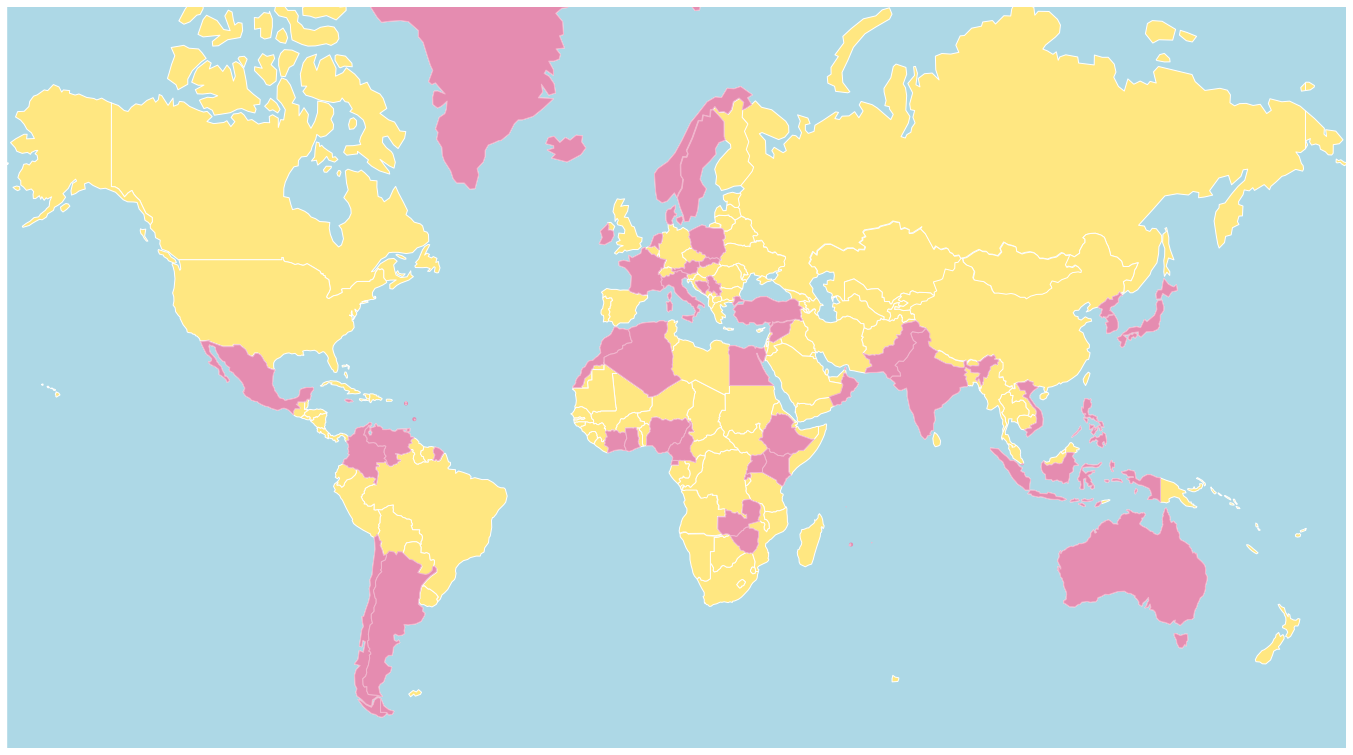

In [5]:
### Makes the Map ###

sea =gpd.GeoDataFrame([{'geometry':basemap.unary_union.envelope}],crs='EPSG:4326')

map_kwargs = {                                           # sets up projection and plot area, 
    'projection': gcrs.Mercator(central_longitude=11),   # buggy as hell, there is no logic as
    'extent':(-180, -60, 120, 77),                       # to why these numbers work but they do
}

ax = gplt.polyplot(sea,
                   figsize=(24,24),
                   facecolor='#add8e6',           # color of the unread countries
                   linewidth=0,
                   zorder=1,
                   **map_kwargs,
                  )

unread = gplt.polyplot(basemap,
                       ax=ax,
                       figsize=(24,24),
                       facecolor='#FFE781',           # color of the unread countries
                       edgecolor='white',             # border colors
                       linewidth=1,
                       zorder=5,
                       **map_kwargs,
                      )

read = gplt.polyplot(read_countries,
                     ax=ax,
                     facecolor='#E58CB0',          # color of the read countries
                     edgecolor='#F1B6CE',
                     zorder=10,
                     **map_kwargs,
                    )

read_small = gplt.pointplot(read_country_points,   # dots for countries too small to show up
                            ax=ax,
                            color='#E58CB0',
                            marker="o",
                            s=3,
                            zorder=5,
                            **map_kwargs
                           )


bg_color='#add8e6'                           # colors in the "sea"
read_small.patch.set_facecolor(bg_color)

savefig('book_map-test.png',              # filename
        bbox_inches = 'tight', 
        pad_inches = 0,
       facecolor='#add8e6')

In [6]:
sea =gpd.GeoDataFrame([{'geometry':[Point(-180, -60), Point(120, 77)]}],crs='EPSG:4326')


NameError: name 'Point' is not defined

In [ ]:
sea

In [ ]:
basemap.d